In [112]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
import numpy as np

# Load dataset
df = pd.read_csv("/Users/anyakhurana/Documents/Rpo_analysis_project/rpoABC_variation_rifampicin_resistance.csv")

# Target encoding
y = df['Resistance'].map({'S': 0, 'R': 1}).astype(int)

# One-hot encode features
X = df.drop(columns=['ID', 'Resistance'])
X = pd.get_dummies(X, drop_first=False)

# Stratified CV for fairness
cv10 = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

print("Class balance:", y.value_counts(normalize=True))
print("X shape:", X.shape)


Class balance: Resistance
1    0.5
0    0.5
Name: proportion, dtype: float64
X shape: (98, 197)


In [113]:
X = df.drop(columns=['ID', 'Resistance'])
X = pd.get_dummies(X, drop_first=False)
y = df['Resistance'].map({'S': 0, 'R': 1}).astype(int)


In [114]:
from sklearn.model_selection import StratifiedKFold
cv10 = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)


In [115]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

svm_pipe = Pipeline([
    ('scaler', StandardScaler(with_mean=False)),
    ('clf', SVC(probability=True, random_state=42))
])


In [116]:
y = df['Resistance'].map({'S': 0, 'R': 1}).astype(int)


In [117]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

svm_pipe = Pipeline([
    ('scaler', StandardScaler(with_mean=False)),  # safe for sparse one-hot
    ('clf', SVC(probability=True, random_state=42))
])


In [118]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold

In [119]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

svm_pipe = Pipeline([
    ('scaler', StandardScaler(with_mean=False)),  # safe for sparse one-hot
    ('clf', SVC(probability=True, random_state=42))
])


In [120]:
print(y.value_counts(normalize=True))  # Class balance
for model in [svm_best, log_best, xgb_best]:
    print(np.unique(model.predict(X), return_counts=True))  # Predicting both classes?


Resistance
1    0.5
0    0.5
Name: proportion, dtype: float64
(array([0, 1]), array([50, 48]))
(array([0, 1]), array([52, 46]))
(array([0, 1]), array([51, 47]))


In [121]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("/Users/anyakhurana/Documents/Rpo_analysis_project/rpoABC_variation_rifampicin_resistance.csv")

# Print the first few rows and the column names
print(df.columns)
print(df.head())

Index(['Unnamed: 0', 'NC_000962.3:3877464-3878507+287',
       'NC_000962.3:3877464-3878507+689', 'NC_000962.3:759807-763325+36',
       'NC_000962.3:759807-763325+97', 'NC_000962.3:759807-763325+132',
       'NC_000962.3:759807-763325+509', 'NC_000962.3:759807-763325+606',
       'NC_000962.3:759807-763325+673', 'NC_000962.3:759807-763325+696',
       'NC_000962.3:759807-763325+801', 'NC_000962.3:759807-763325+857',
       'NC_000962.3:759807-763325+1133', 'NC_000962.3:759807-763325+1289',
       'NC_000962.3:759807-763325+1303', 'NC_000962.3:759807-763325+1304',
       'NC_000962.3:759807-763325+1325', 'NC_000962.3:759807-763325+1333',
       'NC_000962.3:759807-763325+1334', 'NC_000962.3:759807-763325+1335',
       'NC_000962.3:759807-763325+1349', 'NC_000962.3:759807-763325+1471',
       'NC_000962.3:759807-763325+2014', 'NC_000962.3:759807-763325+2479',
       'NC_000962.3:759807-763325+2728', 'NC_000962.3:759807-763325+3189',
       'NC_000962.3:759807-763325+3225', 'NC_000962.3:

In [122]:
from sklearn.svm import SVC

model = SVC(class_weight='balanced', probability=True, random_state=42)


In [123]:
from sklearn.model_selection import train_test_split

# Split data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,     
    random_state=42
)


In [124]:
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

print("\nFirst 5 rows of training data:")
print(X_train.head())

print("\nFirst 5 rows of testing data:")
print(X_test.head())

print("\nTraining labels distribution:")
print(y_train.value_counts())

print("\nTesting labels distribution:")
print(y_test.value_counts())


Training data shape: (78, 197)
Testing data shape: (20, 197)

First 5 rows of training data:
    Unnamed: 0  NC_000962.3:3877464-3878507+287_C  \
19          19                              False   
67          67                              False   
72          72                              False   
74          74                              False   
0            0                              False   

    NC_000962.3:3877464-3878507+287_T  NC_000962.3:3877464-3878507+689_C  \
19                               True                              False   
67                               True                              False   
72                               True                              False   
74                               True                              False   
0                                True                              False   

    NC_000962.3:3877464-3878507+689_T  NC_000962.3:759807-763325+36_C  \
19                               True                     

In [125]:
from sklearn.svm import SVC

model = SVC(class_weight='balanced', probability=True, random_state=42)
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler


#  Prepare Data
# =========================
X = df.drop(columns=['ID', 'Resistance'])
y = df['Resistance']
# show categorical features (if needed)
X_encoded = pd.get_dummies(X)
# show target labels to numeric: 'S' -> 0, 'R' -> 1
le = LabelEncoder()
y_encoded = le.fit_transform(y)


# we need to do Hyperparameter Tuning
# =========================
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1],
    'kernel': ['linear', 'rbf', 'poly']
}


# Define the cross-validation 
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
#load the random search
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_iter=100,
    scoring='accuracy',
    cv=cv,
    random_state=42,
    n_jobs=-1,
    verbose=1
)



# Fit the model correctly
random_search.fit(X_encoded, y_encoded)
print("Best Parameters (XGB):", random_search.best_params_)
print("Best Score (XGB):", random_search.best_score_)
print("Best Estimator (XGB):", random_search.best_estimator_)


Fitting 5 folds for each of 60 candidates, totalling 300 fits


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 60 is smaller than n_iter=100. Running 60 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Parameters (XGB): {'kernel': 'rbf', 'gamma': 'auto', 'C': 100}
Best Score (XGB): 0.9589473684210527
Best Estimator (XGB): SVC(C=100, class_weight='balanced', gamma='auto', probability=True,
    random_state=42)


In [126]:
from sklearn.svm import SVC

model = SVC(class_weight='balanced', probability=True, random_state=42)
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler


#  Prepare Data
# =========================
X = df.drop(columns=['ID', 'Resistance'])
y = df['Resistance']
# show categorical features (if needed)
X_encoded = pd.get_dummies(X)
# show target labels to numeric: 'S' -> 0, 'R' -> 1
le = LabelEncoder()
y_encoded = le.fit_transform(y)


# we need to do Hyperparameter Tuning
# =========================
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1],
    'kernel': ['linear', 'rbf', 'poly']
}


# Define the cross-validation 
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
#load the random search
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_iter=100,
    scoring='accuracy',
    cv=cv,
    random_state=42,
    n_jobs=-1,
    verbose=1
)



# Fit the model correctly
random_search.fit(X_encoded, y_encoded)
print("Best Parameters (XGB):", random_search.best_params_)
print("Best Score (XGB):", random_search.best_score_)
print("Best Estimator (XGB):", random_search.best_estimator_)


Fitting 10 folds for each of 60 candidates, totalling 600 fits


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 60 is smaller than n_iter=100. Running 60 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Parameters (XGB): {'kernel': 'rbf', 'gamma': 'auto', 'C': 100}
Best Score (XGB): 0.9800000000000001
Best Estimator (XGB): SVC(C=100, class_weight='balanced', gamma='auto', probability=True,
    random_state=42)


In [127]:
# --- SVM ---
svm_pipe = Pipeline([
    ('scaler', StandardScaler(with_mean=False)),
    ('clf', SVC(probability=True, random_state=42))
])
svm_params = {
    'clf__C': [0.1, 1, 10],
    'clf__kernel': ['linear', 'rbf'],
    'clf__gamma': ['scale', 'auto']
}
svm_search = RandomizedSearchCV(svm_pipe, svm_params, n_iter=10, cv=cv10, n_jobs=-1, random_state=42)
svm_search.fit(X, y)
print("SVM best score:", svm_search.best_score_)

# --- Logistic Regression ---
log_pipe = Pipeline([
    ('scaler', StandardScaler(with_mean=False)),
    ('clf', LogisticRegression(solver='liblinear', class_weight='balanced', random_state=42))
])
log_params = {
    'clf__C': [0.1, 1, 10],
    'clf__penalty': ['l1', 'l2']
}
log_search = RandomizedSearchCV(log_pipe, log_params, n_iter=10, cv=cv10, n_jobs=-1, random_state=42)
log_search.fit(X, y)
print("Logistic best score:", log_search.best_score_)

# --- Random Forest ---
rf = RandomForestClassifier(class_weight='balanced', random_state=42, n_jobs=-1)
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2', None]
}
rf_search = RandomizedSearchCV(rf, rf_params, n_iter=10, cv=cv10, n_jobs=-1, random_state=42)
rf_search.fit(X, y)
print("Random Forest best score:", rf_search.best_score_)

# --- XGBoost ---
xgb = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
xgb_params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}
xgb_search = RandomizedSearchCV(xgb, xgb_params, n_iter=10, cv=cv10, n_jobs=-1, random_state=42)
xgb_search.fit(X, y)
print("XGB best score:", xgb_search.best_score_)


ValueError: 
All the 100 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/pipeline.py", line 655, in fit
    Xt = self._fit(X, y, routed_params, raw_params=params)
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/pipeline.py", line 589, in _fit
    X, fitted_transformer = fit_transform_one_cached(
                            ~~~~~~~~~~~~~~~~~~~~~~~~^
        cloned_transformer,
        ^^^^^^^^^^^^^^^^^^^
    ...<5 lines>...
        params=step_params,
        ^^^^^^^^^^^^^^^^^^^
    )
    ^
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/joblib/memory.py", line 326, in __call__
    return self.func(*args, **kwargs)
           ~~~~~~~~~^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/pipeline.py", line 1540, in _fit_transform_one
    res = transformer.fit_transform(X, y, **params.get("fit_transform", {}))
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/_set_output.py", line 316, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/base.py", line 897, in fit_transform
    return self.fit(X, y, **fit_params).transform(X)
           ~~~~~~~~^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/preprocessing/_data.py", line 907, in fit
    return self.partial_fit(X, y, sample_weight)
           ~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/preprocessing/_data.py", line 943, in partial_fit
    X = validate_data(
        self,
    ...<4 lines>...
        reset=first_call,
    )
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py", line 2954, in validate_data
    out = check_array(X, input_name="X", **check_params)
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py", line 1053, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/_array_api.py", line 757, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/pandas/core/generic.py", line 2168, in __array__
    arr = np.asarray(values, dtype=dtype)
ValueError: could not convert string to float: 'T'

--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/pipeline.py", line 655, in fit
    Xt = self._fit(X, y, routed_params, raw_params=params)
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/pipeline.py", line 589, in _fit
    X, fitted_transformer = fit_transform_one_cached(
                            ~~~~~~~~~~~~~~~~~~~~~~~~^
        cloned_transformer,
        ^^^^^^^^^^^^^^^^^^^
    ...<5 lines>...
        params=step_params,
        ^^^^^^^^^^^^^^^^^^^
    )
    ^
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/joblib/memory.py", line 326, in __call__
    return self.func(*args, **kwargs)
           ~~~~~~~~~^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/pipeline.py", line 1540, in _fit_transform_one
    res = transformer.fit_transform(X, y, **params.get("fit_transform", {}))
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/_set_output.py", line 316, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/base.py", line 897, in fit_transform
    return self.fit(X, y, **fit_params).transform(X)
           ~~~~~~~~^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/preprocessing/_data.py", line 907, in fit
    return self.partial_fit(X, y, sample_weight)
           ~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/preprocessing/_data.py", line 943, in partial_fit
    X = validate_data(
        self,
    ...<4 lines>...
        reset=first_call,
    )
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py", line 2954, in validate_data
    out = check_array(X, input_name="X", **check_params)
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py", line 1053, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/_array_api.py", line 757, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/pandas/core/generic.py", line 2168, in __array__
    arr = np.asarray(values, dtype=dtype)
ValueError: could not convert string to float: 'C'


In [ ]:
from sklearn.metrics import classification_report, roc_auc_score

# Hold-out test set check
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

best_model = xgb_search.best_estimator_  # replace with model you want to test
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [20:21:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

ROC-AUC: 1.0


## End of XG-Boost and SVM 

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight='balanced', solver='liblinear', random_state=42)


In [ ]:
import pandas as pd
import numpy as np


X = df.drop(columns=['ID', 'Resistance'])
y = df['Resistance'].map({'S': 0, 'R': 1})  


X_encoded = pd.get_dummies(X).fillna(0).astype(float)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold

# Train/test split (so we tune only on training data)
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, stratify=y, random_state=42
)


log_reg = LogisticRegression(
    class_weight='balanced',
    solver='liblinear',   # supports L1/L2 for binary
    max_iter=1000,
    random_state=42
)


param_grid = {
    'C': [0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100],
    'penalty': ['l1', 'l2']   
}

# 10-fold cross 
cv_tune = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

random_search = RandomizedSearchCV(
    estimator=log_reg,
    param_distributions=param_grid,
    n_iter=20,                 # try up to 20 combos
    scoring='accuracy',        # use 'roc_auc' if you prefer
    cv=cv_tune,
    random_state=42,
    n_jobs=-1,
    verbose=1
)

random_search.fit(X_train, y_train)

print("Best Params (LogReg):", random_search.best_params_)
print("Best CV Accuracy (tuning on train):", random_search.best_score_)


Fitting 10 folds for each of 20 candidates, totalling 200 fits
Best Params (LogReg): {'penalty': 'l1', 'C': 10}
Best CV Accuracy (tuning on train): 0.8821428571428571


In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

best_logreg = random_search.best_estimator_

cv_10 = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
cv_scores = cross_val_score(best_logreg, X_train, y_train, cv=cv_10, scoring='accuracy', n_jobs=-1)

print("10-Fold CV Accuracies (train only):", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())


10-Fold CV Accuracies (train only): [1.         0.875      0.75       0.875      0.875      1.
 0.875      1.         0.71428571 0.85714286]
Mean CV Accuracy: 0.8821428571428571


In [ ]:
from sklearn.linear_model import LogisticRegression

log_pipe = Pipeline([
    ('scaler', StandardScaler(with_mean=False)),
    ('clf', LogisticRegression(solver='liblinear', class_weight='balanced', random_state=42))
])

log_space = {
    'clf__C': [0.1, 1, 10, 100],
    'clf__penalty': ['l1','l2']
}

log_search = RandomizedSearchCV(log_pipe, log_space, n_iter=20, cv=cv10, n_jobs=-1, random_state=42, verbose=1)
log_search.fit(X, y)
log_best = log_search.best_estimator_
log_scores = cross_val_score(log_best, X, y, cv=cv10, n_jobs=-1)


NameError: name 'cv10' is not defined

=== Logistic Regression — Test Performance ===
              precision    recall  f1-score   support

           S       0.91      1.00      0.95        10
           R       1.00      0.90      0.95        10

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.95      0.95      0.95        20

ROC-AUC (Test): 0.9800000000000001
Average Precision (Test): 0.9833333333333333


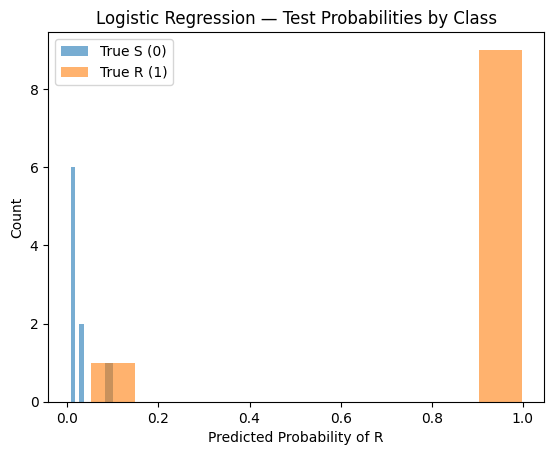

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, average_precision_score
import matplotlib.pyplot as plt

# Fit best model on training data
best_logreg.fit(X_train, y_train)

# Predict on test set
proba_test = best_logreg.predict_proba(X_test)[:, 1]
pred_test = (proba_test >= 0.5).astype(int)

print("=== Logistic Regression — Test Performance ===")
print(classification_report(y_test, pred_test, target_names=["S", "R"], zero_division=0))
print("ROC-AUC (Test):", roc_auc_score(y_test, proba_test))
print("Average Precision (Test):", average_precision_score(y_test, proba_test))

# Compare prediction probability distributions by true class (test set)
plt.figure()
plt.hist(proba_test[y_test == 0], bins=10, alpha=0.6, label='True S (0)')
plt.hist(proba_test[y_test == 1], bins=10, alpha=0.6, label='True R (1)')
plt.xlabel("Predicted Probability of R")
plt.ylabel("Count")
plt.title("Logistic Regression — Test Probabilities by Class")
plt.legend()
plt.show()


## Logistic regression - split into test and train data 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

# Prepare features and labels
X = df.drop(columns=['ID', 'Resistance'])
X = pd.get_dummies(X, drop_first=False)
y = df['Resistance'].map({'S': 0, 'R': 1}).astype(int)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


## Logistic Regression Hyperparameter tuning 

In [ ]:
log_pipe = Pipeline([
    ('scaler', StandardScaler(with_mean=False)),
    ('clf', LogisticRegression(solver='liblinear', class_weight='balanced', random_state=42))
])

log_param_grid = {
    'clf__C': [0.01, 0.1, 1, 10, 100],
    'clf__penalty': ['l1', 'l2']
}

cv_strategy = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

log_search = RandomizedSearchCV(
    estimator=log_pipe,
    param_distributions=log_param_grid,
    n_iter=10,
    cv=cv_strategy,
    n_jobs=-1,
    random_state=42
)

log_search.fit(X_train, y_train)
print("Best Logistic Regression Parameters:", log_search.best_params_)


Best Logistic Regression Parameters: {'clf__penalty': 'l2', 'clf__C': 0.01}


## Logistic Regression - 10 fold cross validation 

In [ ]:
log_best = log_search.best_estimator_
log_scores = cross_val_score(log_best, X, y, cv=cv_strategy, n_jobs=-1)

print("Logistic Regression CV Accuracies:", log_scores)
print("Average Accuracy:", np.mean(log_scores))

# Test set performance
y_pred = log_best.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Logistic Regression CV Accuracies: [0.9        0.8        1.         0.8        0.8        1.
 0.9        1.         0.88888889 1.        ]
Average Accuracy: 0.9088888888888889
Test Accuracy: 0.95
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      0.90      0.95        10

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.95      0.95      0.95        20



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold

# Define the model
log_reg = LogisticRegression(class_weight='balanced', solver='liblinear', random_state=42)



In [ ]:
# Parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

# Cross-validation strategy for tuning
cv_strategy = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Randomized search
random_search = RandomizedSearchCV(
    estimator=log_reg,
    param_distributions=param_grid,
    n_iter=10,
    scoring='accuracy',
    cv=cv_strategy,
    random_state=42,
    n_jobs=-1,
    verbose=1
)

# Fit
random_search.fit(X_encoded, y_encoded)

print("Best Params:", random_search.best_params_)
print("Best CV Accuracy:", random_search.best_score_)


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best Params: {'penalty': 'l1', 'C': 10}
Best CV Accuracy: 0.8988888888888888


In [ ]:
# --- Logistic Regression: Step 1 - Data Split ---
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV, cross_val_score
from sklearn.metrics import classification_report, accuracy_score

# Encode features/target
X = df.drop(columns=['ID', 'Resistance'])
X = pd.get_dummies(X, drop_first=False)
y = df['Resistance'].map({'S': 0, 'R': 1}).astype(int)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# --- Step 2 - Hyperparameter Tuning ---
log_pipe = Pipeline([
    ('scaler', StandardScaler(with_mean=False)),
    ('clf', LogisticRegression(solver='liblinear', class_weight='balanced', random_state=42))
])

log_param_grid = {
    'clf__C': [0.01, 0.1, 1, 10, 100],
    'clf__penalty': ['l1', 'l2']
}

cv_strategy = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

log_search = RandomizedSearchCV(
    estimator=log_pipe,
    param_distributions=log_param_grid,
    n_iter=10,
    cv=cv_strategy,
    n_jobs=-1,
    random_state=42
)

log_search.fit(X_train, y_train)

print("Best Logistic Regression Parameters:", log_search.best_params_)

# --- Step 3 - 10-fold Cross-Validation with Best Model ---
log_best = log_search.best_estimator_
log_scores = cross_val_score(log_best, X, y, cv=cv_strategy, n_jobs=-1)

print("Logistic Regression CV Accuracies:", log_scores)
print("Average Accuracy:", np.mean(log_scores))

# Final test performance
y_pred = log_best.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Best Logistic Regression Parameters: {'clf__penalty': 'l2', 'clf__C': 0.01}
Logistic Regression CV Accuracies: [0.9        0.8        1.         0.8        0.8        1.
 0.9        1.         0.88888889 1.        ]
Average Accuracy: 0.9088888888888889
Test Accuracy: 0.95
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      0.90      0.95        10

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.95      0.95      0.95        20



## SVM - split into test and train 

In [ ]:
from sklearn.svm import SVC

X = df.drop(columns=['ID', 'Resistance'])
X = pd.get_dummies(X, drop_first=False)
y = df['Resistance'].map({'S': 0, 'R': 1}).astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# SVM Hyperparameter Tuning

In [ ]:
svm_pipe = Pipeline([
    ('scaler', StandardScaler(with_mean=False)),
    ('clf', SVC(probability=True, class_weight='balanced', random_state=42))
])

svm_param_grid = {
    'clf__C': [0.01, 0.1, 1, 10, 100],
    'clf__kernel': ['linear', 'rbf'],
    'clf__gamma': ['scale', 'auto']
}

cv_strategy = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

svm_search = RandomizedSearchCV(
    estimator=svm_pipe,
    param_distributions=svm_param_grid,
    n_iter=10,
    cv=cv_strategy,
    n_jobs=-1,
    random_state=42
)

svm_search.fit(X_train, y_train)
print("Best SVM Parameters:", svm_search.best_params_)


Best SVM Parameters: {'clf__kernel': 'linear', 'clf__gamma': 'scale', 'clf__C': 0.01}


##. SVM 10 fold cross validation 

In [ ]:
svm_best = svm_search.best_estimator_
svm_scores = cross_val_score(svm_best, X, y, cv=cv_strategy, n_jobs=-1)

print("SVM CV Accuracies:", svm_scores)
print("Average Accuracy:", np.mean(svm_scores))

# Test set performance
y_pred = svm_best.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


SVM CV Accuracies: [0.9        0.8        1.         0.8        0.8        1.
 0.9        1.         0.88888889 1.        ]
Average Accuracy: 0.9088888888888889
Test Accuracy: 0.95
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      0.90      0.95        10

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.95      0.95      0.95        20



In [ ]:
# --- SVM: Step 1 - Data Split ---
from sklearn.svm import SVC

X = df.drop(columns=['ID', 'Resistance'])
X = pd.get_dummies(X, drop_first=False)
y = df['Resistance'].map({'S': 0, 'R': 1}).astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# --- Step 2 - Hyperparameter Tuning ---
svm_pipe = Pipeline([
    ('scaler', StandardScaler(with_mean=False)),
    ('clf', SVC(probability=True, class_weight='balanced', random_state=42))
])

svm_param_grid = {
    'clf__C': [0.01, 0.1, 1, 10, 100],
    'clf__kernel': ['linear', 'rbf'],
    'clf__gamma': ['scale', 'auto']
}

cv_strategy = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

svm_search = RandomizedSearchCV(
    estimator=svm_pipe,
    param_distributions=svm_param_grid,
    n_iter=10,
    cv=cv_strategy,
    n_jobs=-1,
    random_state=42
)

svm_search.fit(X_train, y_train)

print("Best SVM Parameters:", svm_search.best_params_)

# --- Step 3 - 10-fold Cross-Validation with Best Model ---
svm_best = svm_search.best_estimator_
svm_scores = cross_val_score(svm_best, X, y, cv=cv_strategy, n_jobs=-1)

print("SVM CV Accuracies:", svm_scores)
print("Average Accuracy:", np.mean(svm_scores))

# Final test performance
y_pred = svm_best.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Best SVM Parameters: {'clf__kernel': 'linear', 'clf__gamma': 'scale', 'clf__C': 0.01}
SVM CV Accuracies: [0.9        0.8        1.         0.8        0.8        1.
 0.9        1.         0.88888889 1.        ]
Average Accuracy: 0.9088888888888889
Test Accuracy: 0.95
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      0.90      0.95        10

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.95      0.95      0.95        20



In [141]:
from xgboost import XGBClassifier

X = df.drop(columns=['ID', 'Resistance'])
X = pd.get_dummies(X, drop_first=False)
y = df['Resistance'].map({'S': 0, 'R': 1}).astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [142]:
xgb = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42,
    n_jobs=-1
)

xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

cv_strategy = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

xgb_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=xgb_param_grid,
    n_iter=10,
    cv=cv_strategy,
    n_jobs=-1,
    random_state=42
)

xgb_search.fit(X_train, y_train)
print("Best XGBoost Parameters:", xgb_search.best_params_)


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [15:45:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [15:45:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [15:45:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [15:45:26] WARN

Best XGBoost Parameters: {'subsample': 1.0, 'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 1.0}


In [143]:
xgb_best = xgb_search.best_estimator_
xgb_scores = cross_val_score(xgb_best, X, y, cv=cv_strategy, n_jobs=-1)

print("XGBoost CV Accuracies:", xgb_scores)
print("Average Accuracy:", np.mean(xgb_scores))

# Test set performance
y_pred = xgb_best.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [15:45:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [15:45:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [15:45:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [15:45:37] WARN

XGBoost CV Accuracies: [0.9        1.         1.         0.9        1.         0.9
 1.         1.         0.88888889 1.        ]
Average Accuracy: 0.9588888888888889
Test Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [ ]:
# --- XGBoost: Step 1 - Data Split ---
from xgboost import XGBClassifier

X = df.drop(columns=['ID', 'Resistance'])
X = pd.get_dummies(X, drop_first=False)
y = df['Resistance'].map({'S': 0, 'R': 1}).astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# --- Step 2 - Hyperparameter Tuning ---
xgb = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42,
    n_jobs=-1
)

xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

cv_strategy = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

xgb_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=xgb_param_grid,
    n_iter=10,
    cv=cv_strategy,
    n_jobs=-1,
    random_state=42
)

xgb_search.fit(X_train, y_train)

print("Best XGBoost Parameters:", xgb_search.best_params_)

# --- Step 3 - 10-fold Cross-Validation with Best Model ---
xgb_best = xgb_search.best_estimator_
xgb_scores = cross_val_score(xgb_best, X, y, cv=cv_strategy, n_jobs=-1)

print("XGBoost CV Accuracies:", xgb_scores)
print("Average Accuracy:", np.mean(xgb_scores))

# Final test performance
y_pred = xgb_best.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [15:27:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [15:27:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [15:27:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [15:27:24] WARN

Best XGBoost Parameters: {'subsample': 1.0, 'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 1.0}


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [15:27:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [15:27:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [15:27:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [15:27:31] WARN

XGBoost CV Accuracies: [0.9        1.         1.         0.9        1.         0.9
 1.         1.         0.88888889 1.        ]
Average Accuracy: 0.9588888888888889
Test Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
import pandas as pd

# Prepare data
X_encoded = pd.get_dummies(df.drop(columns=['ID', 'Resistance']))
y = df['Resistance'].map({'S': 0, 'R': 1})

# Pipeline for scaling + logistic regression
log_pipe = Pipeline([
    ('scaler', StandardScaler(with_mean=False)),
    ('clf', LogisticRegression(solver='liblinear', class_weight='balanced', random_state=42))
])

# Parameter grid
param_grid_log = {
    'clf__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'clf__penalty': ['l1', 'l2']
}

random_search_log = RandomizedSearchCV(
    estimator=log_pipe,
    param_distributions=param_grid_log,
    n_iter=20,
    cv=10,  # 10-fold CV
    scoring='accuracy',
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search_log.fit(X_encoded, y)

print("Best parameters found (Logistic Regression):", random_search_log.best_params_)
print(f"Best cross-validation accuracy: {random_search_log.best_score_:.4f}")


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 12 is smaller than n_iter=20. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 10 folds for each of 12 candidates, totalling 120 fits
[CV] END ......................clf__C=0.001, clf__penalty=l1; total time=   0.0s
[CV] END ......................clf__C=0.001, clf__penalty=l1; total time=   0.0s
[CV] END ......................clf__C=0.001, clf__penalty=l1; total time=   0.0s
[CV] END ......................clf__C=0.001, clf__penalty=l1; total time=   0.0s
[CV] END ......................clf__C=0.001, clf__penalty=l1; total time=   0.0s
[CV] END ......................clf__C=0.001, clf__penalty=l1; total time=   0.0s
[CV] END ......................clf__C=0.001, clf__penalty=l1; total time=   0.0s
[CV] END ......................clf__C=0.001, clf__penalty=l1; total time=   0.0s
[CV] END ......................clf__C=0.001, clf__penalty=l1; total time=   0.0s
[CV] END ......................clf__C=0.001, clf__penalty=l1; total time=   0.0s
[CV] END ......................clf__C=0.001, clf__penalty=l2; total time=   0.0s
[CV] END ......................clf__C=0.001, c

In [128]:
from sklearn.svm import SVC

# Pipeline for scaling + SVM
svm_pipe = Pipeline([
    ('scaler', StandardScaler(with_mean=False)),
    ('clf', SVC(probability=True, class_weight='balanced', random_state=42))
])

# Parameter grid
param_grid_svm = {
    'clf__C': [0.01, 0.1, 1, 10, 100],
    'clf__kernel': ['linear', 'rbf'],
    'clf__gamma': ['scale', 'auto']
}

random_search_svm = RandomizedSearchCV(
    estimator=svm_pipe,
    param_distributions=param_grid_svm,
    n_iter=20,
    cv=10,  # 10-fold CV
    scoring='accuracy',
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search_svm.fit(X_encoded, y)

print("Best parameters found (SVM):", random_search_svm.best_params_)
print(f"Best cross-validation accuracy: {random_search_svm.best_score_:.4f}")


Fitting 10 folds for each of 20 candidates, totalling 200 fits
[CV] END ..clf__C=0.01, clf__gamma=scale, clf__kernel=linear; total time=   0.1s
[CV] END ..clf__C=0.01, clf__gamma=scale, clf__kernel=linear; total time=   0.1s
[CV] END ..clf__C=0.01, clf__gamma=scale, clf__kernel=linear; total time=   0.1s
[CV] END ..clf__C=0.01, clf__gamma=scale, clf__kernel=linear; total time=   0.0s
[CV] END ..clf__C=0.01, clf__gamma=scale, clf__kernel=linear; total time=   0.0s
[CV] END ..clf__C=0.01, clf__gamma=scale, clf__kernel=linear; total time=   0.1s
[CV] END ..clf__C=0.01, clf__gamma=scale, clf__kernel=linear; total time=   0.0s
[CV] END ..clf__C=0.01, clf__gamma=scale, clf__kernel=linear; total time=   0.1s
[CV] END ..clf__C=0.01, clf__gamma=scale, clf__kernel=linear; total time=   0.1s
[CV] END ..clf__C=0.01, clf__gamma=scale, clf__kernel=linear; total time=   0.0s
[CV] END .....clf__C=0.01, clf__gamma=scale, clf__kernel=rbf; total time=   0.0s
[CV] END .....clf__C=0.01, clf__gamma=scale, c

In [131]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42,
    n_jobs=-1
)

param_grid_xgb = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

random_search_xgb = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid_xgb,
    n_iter=20,
    cv=10,  # 10-fold CV
    scoring='accuracy',
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search_xgb.fit(X_encoded, y)

print("Best parameters found (XGBoost):", random_search_xgb.best_params_)
print(f"Best cross-validation accuracy: {random_search_xgb.best_score_:.4f}")


Fitting 10 folds for each of 20 candidates, totalling 200 fits


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=200,

ValueError: 
All the 200 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
200 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/core.py", line 729, in inner_f
    return func(**kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/sklearn.py", line 1641, in fit
    raise ValueError(
    ...<2 lines>...
    )
ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1], got ['R' 'S']


## logistic regression - split into train and test data

In [132]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
import pandas as pd

# Prepare data
X_encoded = pd.get_dummies(df.drop(columns=['ID', 'Resistance']))
y = df['Resistance'].map({'S': 0, 'R': 1})

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)


## Hyperparameter tuning

In [133]:
from sklearn.model_selection import RandomizedSearchCV

log_pipe = Pipeline([
    ('scaler', StandardScaler(with_mean=False)),
    ('clf', LogisticRegression(solver='liblinear', class_weight='balanced', random_state=42))
])

param_grid_log = {
    'clf__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'clf__penalty': ['l1', 'l2']
}

random_search_log = RandomizedSearchCV(
    estimator=log_pipe,
    param_distributions=param_grid_log,
    n_iter=20,
    cv=15,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search_log.fit(X_train, y_train)
print("Best parameters:", random_search_log.best_params_)
print(f"Best CV accuracy: {random_search_log.best_score_:.4f}")


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 12 is smaller than n_iter=20. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 15 folds for each of 12 candidates, totalling 180 fits
[CV] END ......................clf__C=0.001, clf__penalty=l1; total time=   0.1s
[CV] END ......................clf__C=0.001, clf__penalty=l1; total time=   0.1s
[CV] END ......................clf__C=0.001, clf__penalty=l1; total time=   0.1s
[CV] END ......................clf__C=0.001, clf__penalty=l1; total time=   0.1s
[CV] END ......................clf__C=0.001, clf__penalty=l1; total time=   0.1s
[CV] END ......................clf__C=0.001, clf__penalty=l1; total time=   0.1s
[CV] END ......................clf__C=0.001, clf__penalty=l1; total time=   0.1s
[CV] END ......................clf__C=0.001, clf__penalty=l1; total time=   0.1s
[CV] END ......................clf__C=0.001, clf__penalty=l1; total time=   0.0s
[CV] END ......................clf__C=0.001, clf__penalty=l1; total time=   0.1s
[CV] END ......................clf__C=0.001, clf__penalty=l1; total time=   0.1s
[CV] END ......................clf__C=0.001, c

## 10 fold cross logistic 

In [134]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
import numpy as np

log_best = random_search_log.best_estimator_
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores_log = cross_val_score(log_best, X_encoded, y, cv=cv)

print("10-Fold CV Accuracies:", scores_log)
print("Average Accuracy:", np.mean(scores_log))


10-Fold CV Accuracies: [0.9        0.8        1.         0.8        0.8        1.
 0.9        1.         0.88888889 1.        ]
Average Accuracy: 0.9088888888888889


In [137]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Step 1: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

# Step 2: Logistic Regression Model
log_model = Pipeline([
    ('scaler', StandardScaler(with_mean=False)),
    ('clf', LogisticRegression(solver='liblinear', class_weight='balanced', random_state=42))
])
log_model.fit(X_train, y_train)

# Step 3: Evaluation
y_pred = log_model.predict(X_test)
log_acc = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:", log_acc)
print(classification_report(y_test, y_pred))


Logistic Regression Accuracy: 0.95
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      0.90      0.95        10

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.95      0.95      0.95        20



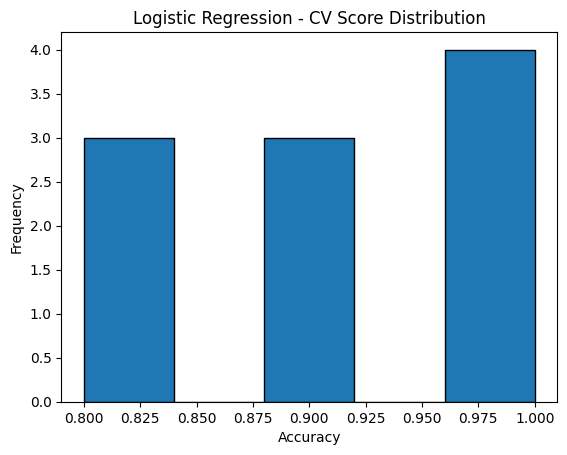

In [138]:
import matplotlib.pyplot as plt

plt.hist(scores_log, bins=5, edgecolor='black')
plt.title("Logistic Regression - CV Score Distribution")
plt.xlabel("Accuracy")
plt.ylabel("Frequency")
plt.show()


# Logistic Regression # 

# split into test and train data 

In [145]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

# Prepare features and labels
X = df.drop(columns=['ID', 'Resistance'])
X = pd.get_dummies(X, drop_first=False)
y = df['Resistance'].map({'S': 0, 'R': 1}).astype(int)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


# Hyperparameter tuning

In [146]:
log_pipe = Pipeline([
    ('scaler', StandardScaler(with_mean=False)),
    ('clf', LogisticRegression(solver='liblinear', class_weight='balanced', random_state=42))
])

log_param_grid = {
    'clf__C': [0.01, 0.1, 1, 10, 100],
    'clf__penalty': ['l1', 'l2']
}

cv_strategy = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

log_search = RandomizedSearchCV(
    estimator=log_pipe,
    param_distributions=log_param_grid,
    n_iter=10,
    cv=cv_strategy,
    n_jobs=-1,
    random_state=42
)

log_search.fit(X_train, y_train)
print("Best Logistic Regression Parameters:", log_search.best_params_)


Best Logistic Regression Parameters: {'clf__penalty': 'l2', 'clf__C': 0.01}


## 1 fold cross

In [147]:
log_best = log_search.best_estimator_
log_scores = cross_val_score(log_best, X, y, cv=cv_strategy, n_jobs=-1)

print("Logistic Regression CV Accuracies:", log_scores)
print("Average Accuracy:", np.mean(log_scores))

# Test set performance
y_pred = log_best.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Logistic Regression CV Accuracies: [0.9        0.8        1.         0.8        0.8        1.
 0.9        1.         0.88888889 1.        ]
Average Accuracy: 0.9088888888888889
Test Accuracy: 0.95
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      0.90      0.95        10

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.95      0.95      0.95        20



# SVM 

# training and testing

In [148]:
from sklearn.svm import SVC

X = df.drop(columns=['ID', 'Resistance'])
X = pd.get_dummies(X, drop_first=False)
y = df['Resistance'].map({'S': 0, 'R': 1}).astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


# Hyperparameter tuning

In [149]:
svm_pipe = Pipeline([
    ('scaler', StandardScaler(with_mean=False)),
    ('clf', SVC(probability=True, class_weight='balanced', random_state=42))
])

svm_param_grid = {
    'clf__C': [0.01, 0.1, 1, 10, 100],
    'clf__kernel': ['linear', 'rbf'],
    'clf__gamma': ['scale', 'auto']
}

cv_strategy = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

svm_search = RandomizedSearchCV(
    estimator=svm_pipe,
    param_distributions=svm_param_grid,
    n_iter=10,
    cv=cv_strategy,
    n_jobs=-1,
    random_state=42
)

svm_search.fit(X_train, y_train)
print("Best SVM Parameters:", svm_search.best_params_)


Best SVM Parameters: {'clf__kernel': 'linear', 'clf__gamma': 'scale', 'clf__C': 0.01}


# 10 fold cross validation 

In [150]:
svm_best = svm_search.best_estimator_
svm_scores = cross_val_score(svm_best, X, y, cv=cv_strategy, n_jobs=-1)

print("SVM CV Accuracies:", svm_scores)
print("Average Accuracy:", np.mean(svm_scores))

# Test set performance
y_pred = svm_best.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


SVM CV Accuracies: [0.9        0.8        1.         0.8        0.8        1.
 0.9        1.         0.88888889 1.        ]
Average Accuracy: 0.9088888888888889
Test Accuracy: 0.95
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      0.90      0.95        10

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.95      0.95      0.95        20



# Xg-Boost

# split into train and test

In [151]:
from xgboost import XGBClassifier

X = df.drop(columns=['ID', 'Resistance'])
X = pd.get_dummies(X, drop_first=False)
y = df['Resistance'].map({'S': 0, 'R': 1}).astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


# Hyperparameter tuning

In [152]:
xgb = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42,
    n_jobs=-1
)

xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

cv_strategy = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

xgb_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=xgb_param_grid,
    n_iter=10,
    cv=cv_strategy,
    n_jobs=-1,
    random_state=42
)

xgb_search.fit(X_train, y_train)
print("Best XGBoost Parameters:", xgb_search.best_params_)


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [15:51:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [15:51:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [15:51:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [15:51:51] WARN

Best XGBoost Parameters: {'subsample': 1.0, 'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 1.0}


# 10 fold cross validation

In [153]:
xgb_best = xgb_search.best_estimator_
xgb_scores = cross_val_score(xgb_best, X, y, cv=cv_strategy, n_jobs=-1)

print("XGBoost CV Accuracies:", xgb_scores)
print("Average Accuracy:", np.mean(xgb_scores))

# Test set performance
y_pred = xgb_best.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [15:52:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [15:52:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [15:52:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [15:52:08] WARN

XGBoost CV Accuracies: [0.9        1.         1.         0.9        1.         0.9
 1.         1.         0.88888889 1.        ]
Average Accuracy: 0.9588888888888889
Test Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

